In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import tqdm
from tqdm.auto import tqdm

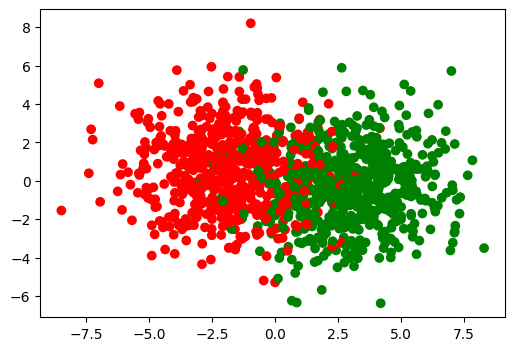

In [2]:
# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=2, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
type(X_train)

numpy.ndarray

In [4]:
if type(X_train) != torch.Tensor:
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)

    y_train = torch.FloatTensor(y_train).view(-1, 1)
    y_test = torch.FloatTensor(y_test).view(-1, 1)

train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=70, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=70, shuffle=False)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, X):
        return self.layers(X)

In [6]:
model = Net()

In [7]:
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [8]:
def train(model, loader, loss, optimizer, num_epoch):
    total_loss = []

    for epoch in tqdm(range(num_epoch)):
        epoch_loss = []

        for X, y in loader:
            y_pred = model(X)
            print(y_pred.shape, y.shape)
            print(y_pred, y)
            loss_value = loss(y_pred, y)
            print(loss_value)
            epoch_loss.append(loss_value.item())

            # Вычисление производных весов
            loss_value.backward()

            # Шаг изменения весов
            optimizer.step()

            # Обнуление производных, сохраненных в оптимизаторе
            optimizer.zero_grad()

        total_loss.append(np.mean(epoch_loss))

        print(f'loss: {np.mean(epoch_loss)}')
    return total_loss


    

In [9]:
train(model, train_loader, loss, optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([70, 1]) torch.Size([70, 1])
tensor([[0.5250],
        [0.4902],
        [0.4171],
        [0.5953],
        [0.5183],
        [0.5708],
        [0.5359],
        [0.5081],
        [0.4740],
        [0.4290],
        [0.5975],
        [0.5789],
        [0.4372],
        [0.5937],
        [0.5782],
        [0.5974],
        [0.4763],
        [0.5531],
        [0.5433],
        [0.5970],
        [0.5478],
        [0.5955],
        [0.5990],
        [0.5981],
        [0.3334],
        [0.5848],
        [0.4879],
        [0.5951],
        [0.3910],
        [0.5402],
        [0.5960],
        [0.4811],
        [0.3580],
        [0.5972],
        [0.5647],
        [0.5987],
        [0.5970],
        [0.5454],
        [0.4724],
        [0.5953],
        [0.5954],
        [0.5573],
        [0.5978],
        [0.5407],
        [0.5944],
        [0.4808],
        [0.5634],
        [0.5974],
        [0.5940],
        [0.5657],
        [0.5969],
        [0.4589],
        [0.4017],
      

[0.6089349261351994,
 0.5891429952212742,
 0.5697393885680607,
 0.5468757578304836,
 0.5251464758600507,
 0.502587331192834,
 0.47930285547460827,
 0.45745959877967834,
 0.43910911892141613,
 0.419845883335386,
 0.4033381087439401,
 0.3858637362718582,
 0.3748967690127237,
 0.3616160580090114,
 0.35076165199279785,
 0.342729389667511,
 0.3312335865838187,
 0.3243128252880914,
 0.3170229835169656,
 0.31597926148346495,
 0.3081763493163245,
 0.3023198555622782,
 0.29964354634284973,
 0.2969751240951674,
 0.29360880702733994,
 0.29072335575308117,
 0.2871551141142845,
 0.2826557047665119,
 0.284104229084083,
 0.28486924937793184,
 0.28030125477484297,
 0.2815911514418466,
 0.28138014887060436,
 0.27817427686282564,
 0.2791165496621813,
 0.27583799191883634,
 0.2741245755127498,
 0.2723649101597922,
 0.2750355154275894,
 0.2741420716047287,
 0.27663755416870117,
 0.2720437762992723,
 0.2696572574121611,
 0.2693630595292364,
 0.2692617252469063,
 0.267669494662966,
 0.2669260565723692,
 0.2

In [10]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred.tolist()

y_pred_final = np.array([int(x[0] > 0.5) for x in y_pred])

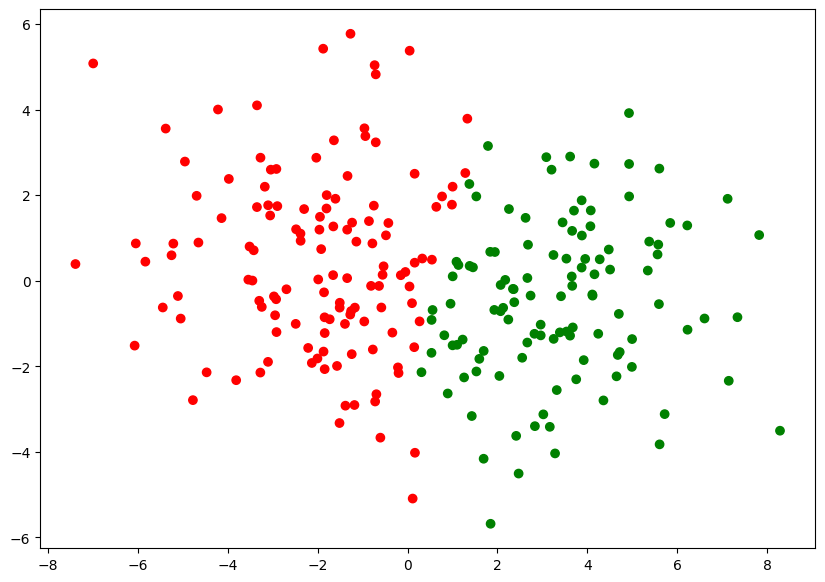

In [11]:
colors = ("red", "green")
colored_y = np.zeros(len(y_pred_final), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y_pred_final.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

In [12]:
asa = torch.tensor(y_pred).reshape(240)
ada = y_test.reshape(240)

In [13]:
print(loss(asa, ada).item())

0.236652210354805
